In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

### Importe o dataset 

In [2]:
mnist = datasets.load_digits()

In [3]:
mnist

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

### Divida o conjunto de dados em treino e teste. Para isso utilize o módulo train_test_split do scikit learn 


In [4]:
from sklearn.model_selection import train_test_split

In [6]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
mnist.target, test_size=0.2, random_state=42)

In [7]:
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.1, random_state=84)

In [9]:
print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

training data points: 1293
validation data points: 144
testing data points: 360


### Inicialize os valores de k para o classificador KNN juntamente com uma lista para armazenar os valores da acurácia

In [10]:
kVals = range(1, 30, 2)
accuracies = []

In [12]:
for k in kVals:
    print(k, end=' ')

1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 

### Utilize o KNeighborsClassifier do scikit learn para criar o seu classificador
https://scikit-learn.org/stable/modules/neighbors.html

In [13]:
for k in kVals:
        # train the k-Nearest Neighbor classifier with the current value of `k`
        model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        model.fit(trainData, trainLabels)
        # evaluate the model and update the accuracies list
        score = model.score(valData, valLabels)
        print("k=%d, accuracy=%.2f%%" % (k, score * 100))
        accuracies.append(score)

k=1, accuracy=100.00%
k=3, accuracy=100.00%
k=5, accuracy=100.00%
k=7, accuracy=99.31%
k=9, accuracy=99.31%
k=11, accuracy=99.31%
k=13, accuracy=99.31%
k=15, accuracy=98.61%
k=17, accuracy=97.92%
k=19, accuracy=97.22%
k=21, accuracy=97.22%
k=23, accuracy=95.83%
k=25, accuracy=95.14%
k=27, accuracy=95.83%
k=29, accuracy=95.83%


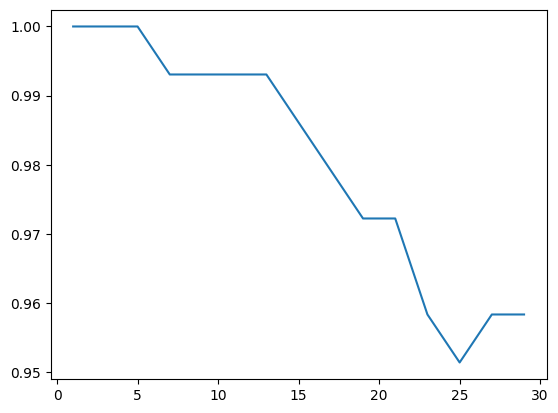

In [14]:
plt.plot(kVals, accuracies)

In [21]:
model.predict(valData[0:1,:])

array([0])

In [26]:
valData[0:1,:]

array([[ 0.,  0.,  9., 15.,  5.,  0.,  0.,  0.,  0.,  3., 15., 15., 16.,
         4.,  0.,  0.,  0., 10., 14.,  0.,  9., 14.,  0.,  0.,  0.,  8.,
        12.,  0.,  0., 12.,  5.,  0.,  0.,  8.,  8.,  0.,  0., 10.,  8.,
         0.,  0.,  5., 14.,  0.,  0., 12.,  8.,  0.,  0.,  0., 16.,  7.,
        12., 16.,  4.,  0.,  0.,  0.,  9., 16., 15.,  7.,  0.,  0.]])

In [27]:
valLabels[0]

0

### Imprima em um gráfico os valores da acurácia em função de k

### Avaliação : Escolha o k com a melhor acurácia e avalie  o modelo utilizabdo as métricas de classificação disponíveis no Scikit Learn

https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics

* confusion_matrix
* accuracy_score
* f1_score
* etc

### Modifique o parâmetro metric do classficiador e avalie outras distâncias métricas disponíveis